# Homework 3

In [2]:
from google.colab import files

uploaded = files.upload()


Saving images.zip to images.zip


In [4]:
import zipfile
import os

archive_name = 'images.zip'
extract_dir = 'images'

with zipfile.ZipFile(archive_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


# Задача №1 - Лес или пустыня?

Часто при анализе изображений местности необходимо понять ее характер. В частности, если определить, что на изображении преобладет вода, то имеет смысл искать корабли на таком изображении. Если на картинке густой лес, то, возможно, это не лучшая зона для посадки дрона или беспилотника.

Ваша задача - написать программу, которая будет отличать лес от пустыни. В приложении можно найти реальные спутниковые снимки лесов и пустынь.

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/nmHHctW/test_image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/dM77C4b/test_image_06.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [9]:
!pip install tensorflow

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

import numpy as np
import os
from tensorflow.keras.preprocessing import image

In [11]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

IMAGE_SIZE = (128, 128)
EPOCHS = 10

DESERT_PATH = "images/desert"
FOREST_PATH = "images/forest"

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = image.load_img(img_path, target_size=IMAGE_SIZE)
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(label)
    return images, labels

desert_images, desert_labels = load_images_from_folder(DESERT_PATH, 0)  # Пустыня = 0
forest_images, forest_labels = load_images_from_folder(FOREST_PATH, 1)  # Лес = 1

X = np.array(desert_images + forest_images)
y = np.array(desert_labels + forest_labels)

indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

split_idx = int(0.8 * len(X))
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6154 - loss: 0.6825 - val_accuracy: 0.5000 - val_loss: 0.6748
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step - accuracy: 0.5385 - loss: 0.7124 - val_accuracy: 1.0000 - val_loss: 0.4953
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step - accuracy: 0.8462 - loss: 0.5273 - val_accuracy: 1.0000 - val_loss: 0.3585
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step - accuracy: 1.0000 - loss: 0.3301 - val_accuracy: 1.0000 - val_loss: 0.2433
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step - accuracy: 1.0000 - loss: 0.2566 - val_accuracy: 1.0000 - val_loss: 0.1198
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step - accuracy: 1.0000 - loss: 0.1296 - val_accuracy: 1.0000 - val_loss: 0.0356
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - accuracy: 1.0000 - loss: 0.0338 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 7.

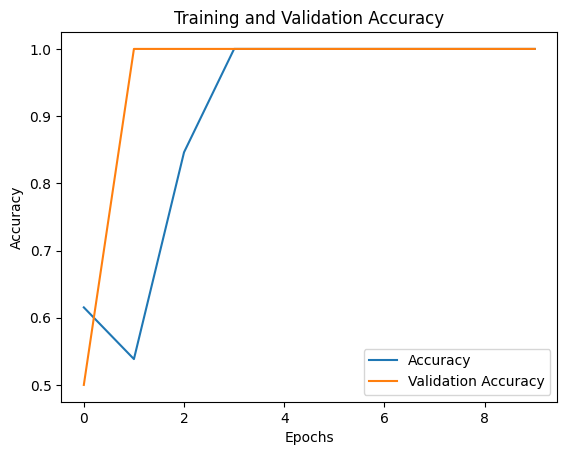

In [15]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


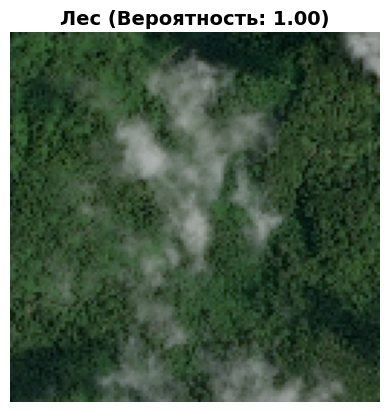

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


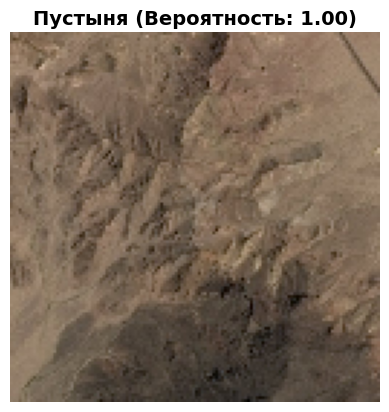

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

IMAGE_SIZE = (128, 128)

def predict_and_show_image(img_path):
    img = image.load_img(img_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Лес" if prediction >= 0.5 else "Пустыня"
    probability = prediction if prediction >= 0.5 else 1 - prediction

    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{label} (Вероятность: {probability:.2f})", fontsize=14, fontweight='bold')
    plt.show()

test_images = ["images/forest/test_image_00.jpg", "images/desert/test_image_04.jpg"]
for img_path in test_images:
    if os.path.exists(img_path):
        predict_and_show_image(img_path)
    else:
        print(f"Файл {img_path} не найден")


# Задача №2 - Реализовать Image-blending на основе сшивки по градиентам

Задача - взять фото двух лиц : ваше и друга, с помощью метода Poisson image editing совместить глаза, нос и рот с первого изображения со вторым. Суть в том, что при использовании такого метода границы совмещенного изображения не видны.

Статья, где описан метод  

Patrick Pérez, Michel Gangnet, and Andrew Blake. 2003. Poisson image editing. ACM Trans. Graph. 22, 3 (July 2003), 313–318. https://doi.org/10.1145/882262.882269

Пример такого совмещения:


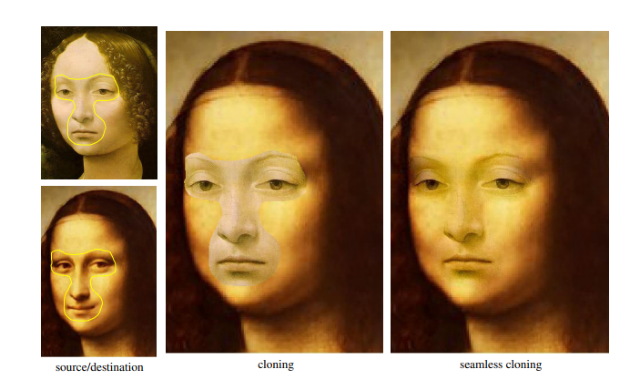

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

IMAGE_PATH = "images/blending/blending.png"

if not os.path.exists(IMAGE_PATH):
    print(f"Файл {IMAGE_PATH} не найден")
else:
    image = cv2.imread(IMAGE_PATH)
    if image is None:
        print(f"Не удалось загрузить изображение по пути {IMAGE_PATH}")
    else:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        fig, axs = plt.subplots(1, 1, figsize=(8, 7))
        axs.imshow(image_rgb)
        axs.axis('off')
        plt.show()


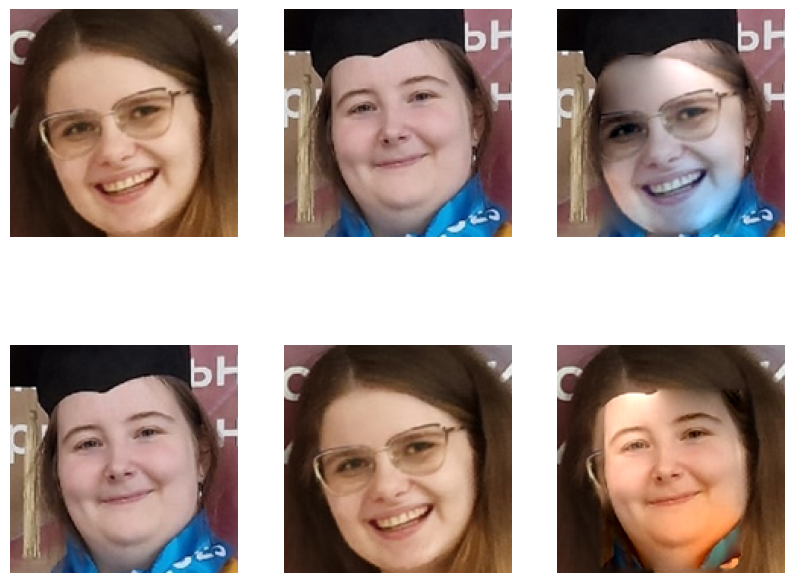

In [28]:
def load_and_convert_image(img_path):
    img = cv2.imread(img_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if img is not None else None

x, y, w, h = 25, 25, 100, 127

def perform_seamless_cloning(img1, img2, x, y, w, h):
    roi1 = img1[y:y+h, x:x+w]
    if roi1.size == 0:
        print("Ошибка: Выбрана некорректная область ROI.")
        return None
    center = (x + w // 2, y + h // 2)
    return cv2.seamlessClone(roi1, img2, np.ones(roi1.shape, dtype=np.uint8)*255, center, cv2.NORMAL_CLONE)

img1_1 = load_and_convert_image("images/blending/dasha.jpg") # мой брат
img2_1 = load_and_convert_image("images/blending/rina.jpg") # я

img1_2 = load_and_convert_image("images/blending/rina.jpg")
img2_2 = load_and_convert_image("images/blending/dasha.jpg")

result_1 = perform_seamless_cloning(img1_1, img2_1, x, y, w, h)
result_2 = perform_seamless_cloning(img1_2, img2_2, x, y, w, h)

plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(img1_1)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img2_1)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(result_1)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img1_2)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img2_2)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(result_2)
plt.axis('off')

plt.show()


# Задача №3 - Найди клетки

Даны снимки раковых клеток. Существует задача - определить стадию рака клетки по такому изображению. Для того, чтобы подойти к решению классификации рака клетки, необходимо сначала подготовить данные.

Исходные изображения в реальных задачах могут быть очень большого размера (более 20000 px). Однако из визуального анализа можно заметить, что большая часть этих снимков пустая и не несет в себе полезную информацию.

Ваша задача выделить небольшие ячейки изображений из исходного так, чтобы на ячейках было только изображение клетки.

Пример исходного изображения и нарезанных ячеек клетки.
<img src="../img/cell_example.png" alt="Drawing" style="width: 500px;"/>

В качестве аргументов у функции будут значения:
1. исходное изображние;
2. размер ячейки;
3. количество ячеек.

__Доп вопрос__ - как можно выяснить какие нужны значения аргументов, чтобы они подходили для большинства исходных снимков?

### 1. Размер клетки (cell_size):

- Надо ориентироваться на среднее разрешение изображений. Для изображений с высоким разрешением используются клетки размером 256-512 пикселей. Для меньших изображений — 50-100 пикселей.

### 2. Количество клеток (cell_count):

- Обычно 16 клеток (4x4) подходят для большинства изображений. Если нужно больше деталей, надо увеличить количество клеток до 25 или 36.
### 3. Паддинг (padding):

- Обычно 5-20 пикселей между клетками. Меньше паддинга для более плотных мозаик, больше — для визуальной четкости.

In [27]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [29]:
def load_image(image_path):
    return np.array(Image.open(image_path))

def extract_cells(image_path, image_np, cell_size, cell_count, padding=10):
    img_height, img_width, _ = image_np.shape
    cells = []
    extracted_cells = 0
    fig, ax = plt.subplots(1)
    ax.imshow(image_np)

    for y in range(0, img_height, cell_size):
        for x in range(0, img_width, cell_size):
            if extracted_cells >= cell_count:
                break

            # Обрезаем клетку
            cell = image_np[y:y + cell_size, x:x + cell_size]

            # Пропускаем клетки с слишком светлым содержимым
            if cell.mean() < 240:
                # Убедимся, что размер клетки соответствует cell_size
                if cell.shape[0] != cell_size or cell.shape[1] != cell_size:
                    cell = cv2.resize(cell, (cell_size, cell_size))  # Масштабируем клетку до нужного размера

                cells.append(cell)
                extracted_cells += 1
                rectangle = patches.Rectangle((x, y), cell_size, cell_size, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rectangle)

    plt.title(f'Оригинал: ' + image_path)
    plt.show()
    return cells

def create_image_mosaic(image_path, image_cells, cell_dimension, padding=10):
    if len(image_cells) > 16:
        image_cells = image_cells[:16]
    elif len(image_cells) < 16:
        repeat_count, remainder = divmod(16, len(image_cells))
        image_cells = image_cells * repeat_count + image_cells[:remainder]

    grid_size = 4
    mosaic_width = grid_size * cell_dimension + (grid_size - 1) * padding
    mosaic = np.ones((mosaic_width, mosaic_width, 3), dtype=np.uint8) * 255

    for index, cell_image in enumerate(image_cells):
        row = index // grid_size
        col = index % grid_size
        y_start = row * (cell_dimension + padding)
        x_start = col * (cell_dimension + padding)
        mosaic[y_start:y_start + cell_dimension, x_start:x_start + cell_dimension] = cell_image

    plt.figure(figsize=(8, 8))
    plt.imshow(mosaic)
    plt.axis('off')
    plt.title(f"Мозаика для {image_path}")
    plt.show()

def create_cells(image_path, cell_size, cell_count, padding=10):
    image_np = load_image(image_path)
    cells = extract_cells(image_path, image_np, cell_size, cell_count, padding)
    create_image_mosaic(image_path, cells, cell_size, padding)

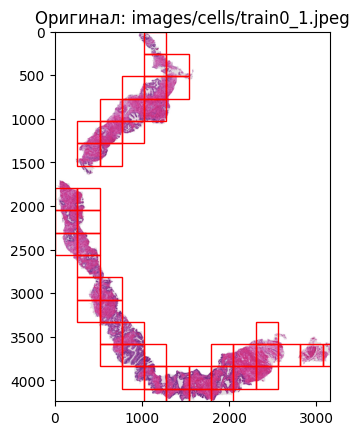

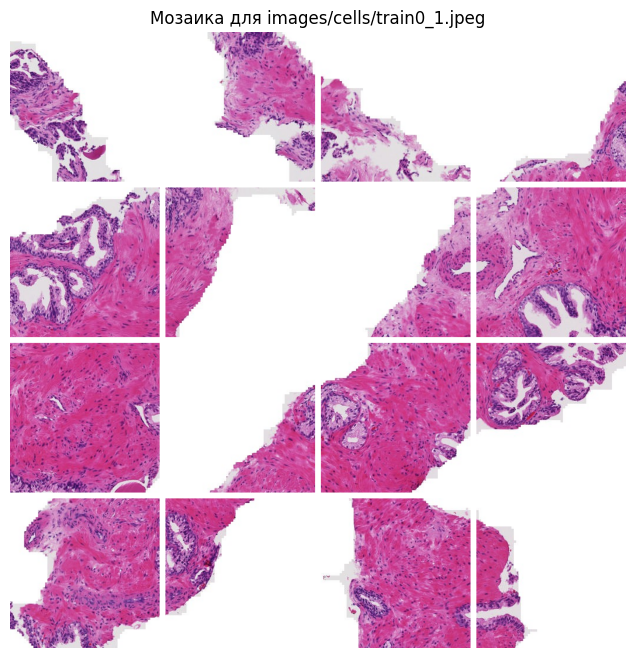

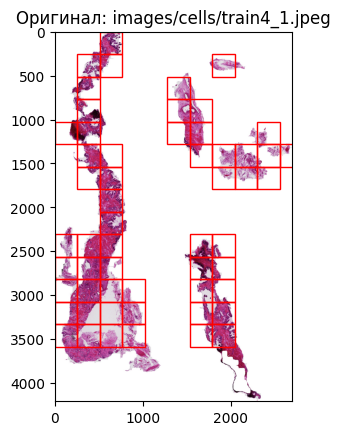

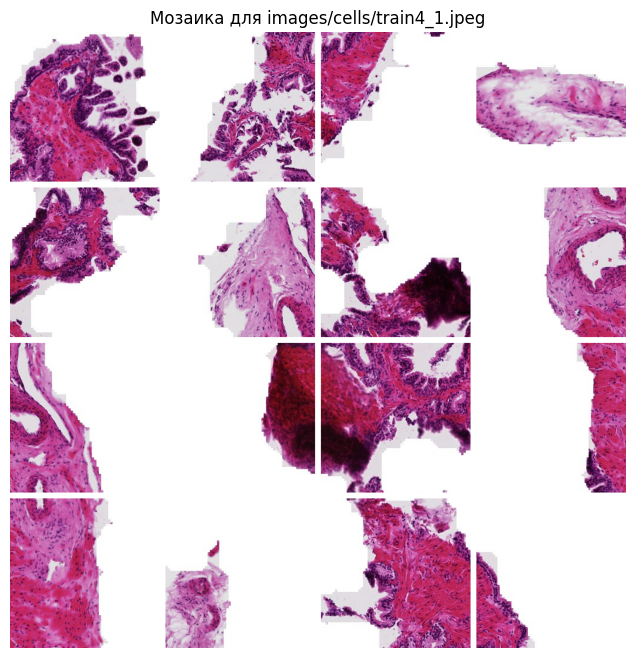

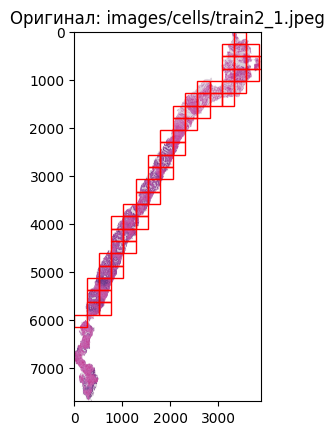

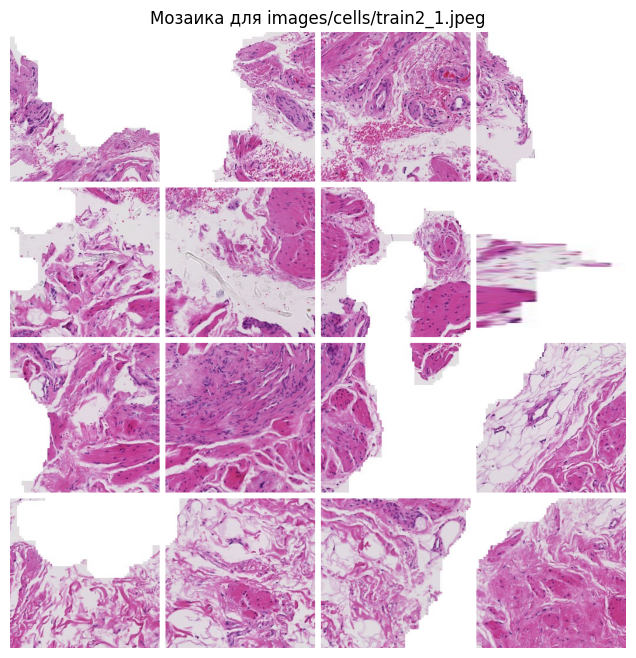

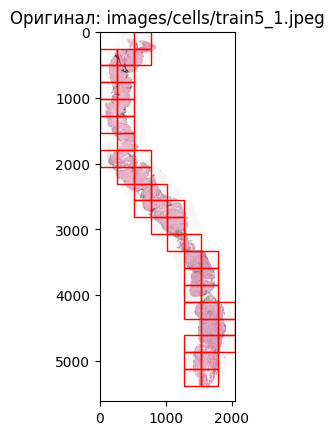

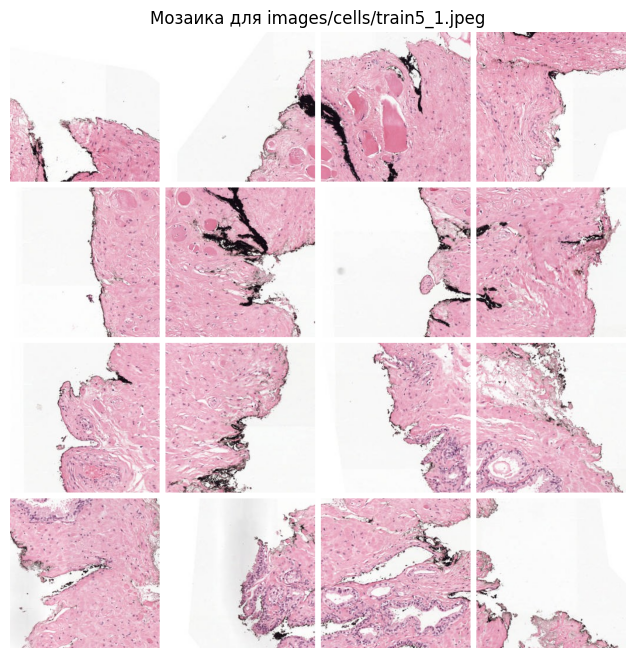

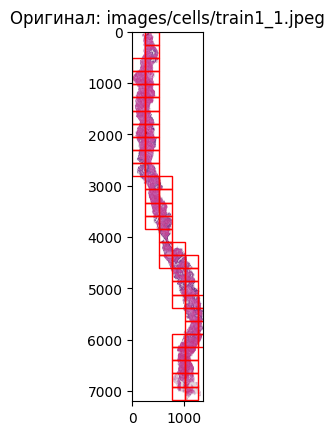

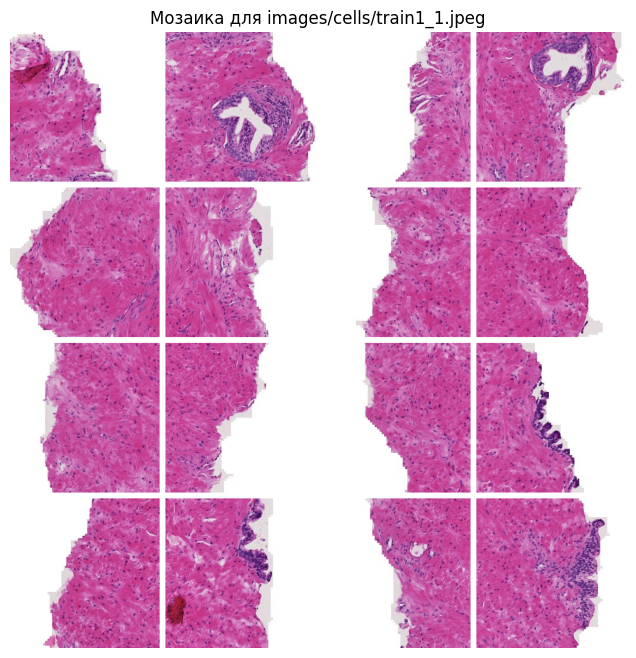

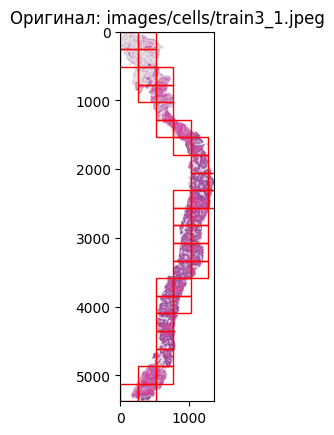

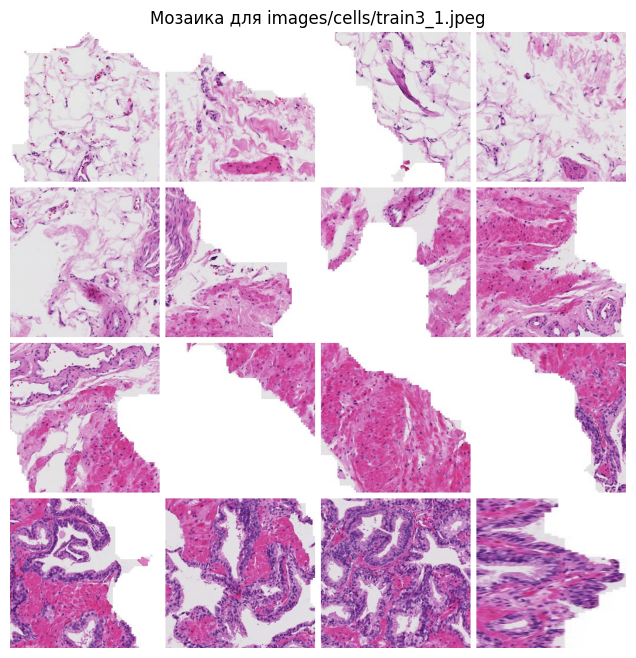

In [31]:
import os

base_path = "images/cells"

# Проверка на существование директории
if not os.path.exists(base_path):
    print(f"Директория {base_path} не найдена")
else:
    image_paths = [os.path.join(base_path, file_name) for file_name in os.listdir(base_path) if file_name.endswith('.jpeg')]

    for path in image_paths:
        create_cells(path, cell_size=256, cell_count=56)
